In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imread
from scipy.fftpack import ifftn, fft2, ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmath
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

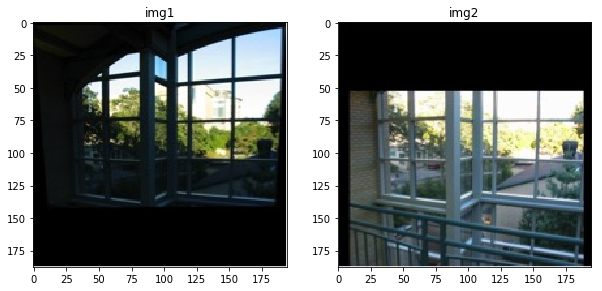

In [3]:
img1=cv2.imread('./imgs/11_img1.jpg')[:,:,::-1]
img2=cv2.imread('./imgs/12_img2.jpg')[:,:,::-1]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("img1")
plt.imshow(img1,cmap=cm.gray)
plt.subplot(1,2,2)
plt.title("img2")
plt.imshow(img2,cmap=cm.gray)
plt.show()

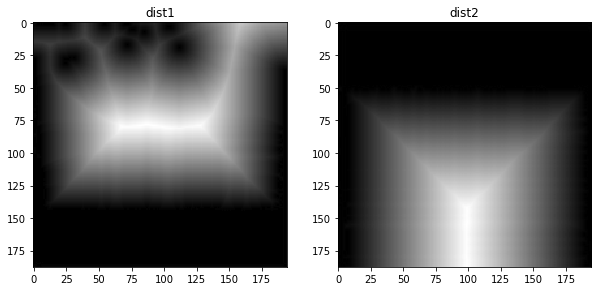

In [4]:
img1Gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
imgDist1=cv2.distanceTransform(img1Gray, distanceType=cv2.DIST_L2, maskSize=5)
img2Gray=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
imgDist2=cv2.distanceTransform(img2Gray, distanceType=cv2.DIST_L2, maskSize=5)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgDist1, cmap="gray")
plt.title("dist1")
plt.subplot(1,2,2)
plt.imshow(imgDist2, cmap="gray")
plt.title("dist2")
plt.show()

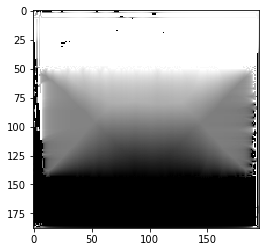

In [5]:
imgAlpha = imgDist1/(imgDist1+imgDist2+1e-5)
plt.imshow(imgAlpha, cmap="gray")
plt.show()

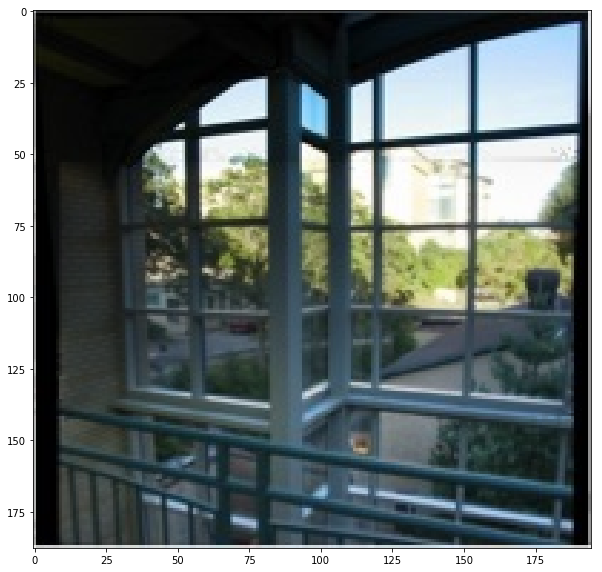

In [6]:
imgBlend12 = img1.copy()
for c in range(3):
    imgBlend12[:,:,c]=img1[:,:,c] * imgAlpha + img2[:,:,c]*(1-imgAlpha)

plt.figure(figsize=(10,10))
plt.imshow(imgBlend12, cmap="gray")
plt.show()

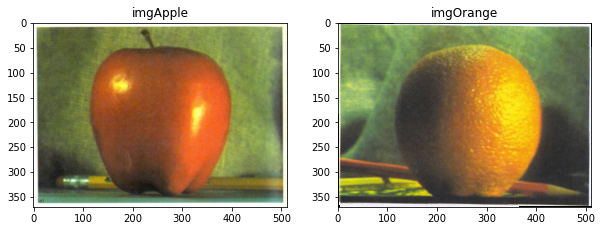

In [7]:
imgApple=cv2.imread("./imgs/13_apple.png")[:,:,::-1]
imgOrange=cv2.imread("./imgs/14_orange.png")[:,:,::-1]
imgOrange=imgOrange[3:-3, 1:-2]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("imgApple")
plt.imshow(imgApple,cmap=cm.gray)
plt.subplot(1,2,2)
plt.title("imgOrange")
plt.imshow(imgOrange,cmap=cm.gray)
plt.show()

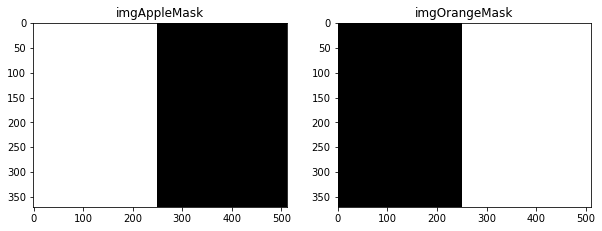

In [8]:
imgAppleMask=np.ones(imgApple.shape[0:2], np.uint8)*255
imgOrangeMask=np.ones(imgOrange.shape[0:2], np.uint8)*255
imgAppleMask[:,250:-1]=0
imgOrangeMask[:,0:250]=0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("imgAppleMask")
plt.imshow(imgAppleMask,cmap=cm.gray)
plt.subplot(1,2,2)
plt.title("imgOrangeMask")
plt.imshow(imgOrangeMask,cmap=cm.gray)
plt.show()

In [15]:
blender=cv2.
roiRect=(0, 0, imgApple.shape[1], imgApple.shape[0])
blender.prepare(roiRect)
blender.feed(imgApple, imgAppleMask, (0,0))
blender.feed(imgOrange, imgOrangeMask, (0,0))
imgBlendAO=imgApple.copy()
dst,dst_mask=blender.blend(imgBlendAO, imgAppleMask)

AttributeError: module 'cv2.detail' has no attribute 'MultiBandBlender'